# Voorbeeld 1:

Voor het eerste voorbeeld gaan we data gebruiken uit het artikel: _Comparative Study of Tumor Growth Based on Single Species Models_ gepubliceerd door S.S. Hassan & H.M. Al-Saedi, 
2024 ("Comparative Study of Tumor Growth Based on Single Species Models", 
BIO Web of Conferences 97, 00118)

Hiervoor gaan we de echte data uit dit onderzoek gebruiken en kijken of één of meerdere van onze modellen hier een goeie fit op kan toepassen. Om te beginnen gaan we voor elk model de AIC-waarde en BIC-waarde berekenen om te kijken welke het meest geschikt is.

In [1]:
# De exacte data inladen:
import pandas as pd
from ode_solver import *

ts_exact = [0, 13, 20, 32, 42, 55, 65, 75, 85, 88, 95, 98, 107, 115, 120]
Vs_exact = [250, 255, 550, 575, 576, 800, 1050, 1250, 1750, 2000, 2550, 2750, 3000, 3500, 4000]

pd.DataFrame({"$t$": ts_exact, "$V$": Vs_exact}).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
$t$,0,13,20,32,42,55,65,75,85,88,95,98,107,115,120
$V$,250,255,550,575,576,800,1050,1250,1750,2000,2550,2750,3000,3500,4000


In [2]:
# Voor elk model de AIC-waarde en BIC-waarde berekenen:
aantal_datapunten = len(Vs_exact)

solver = ode_solver(Vs_exact[0], 15, 8)
# parameters worden megegeven in een dictionairy en met een lambda functie in het model uitgepakt
params0 = {"c" : 0.0, "min_volume" : 0, "max_volume" : 0}
# null waardes als lege gok voor het fitten
params, mse = solver.fit(
    echte_volumes=  Vs_exact,
    model = lambda c, min_volume, max_volume: solver.allee(c, min_volume, max_volume),
    params0 = params0
)
allee_aic = solver.aic(mse, aantal_datapunten, len(params))
alle_bic = solver.bic(mse, aantal_datapunten, len(params))


params0 = {"c" : 0.0, "max_volume" : 0}
params, mse = solver.fit(
    echte_volumes=  Vs_exact,
    model = lambda c, max_volume: solver.exponentieel_afvlakkend(c, max_volume),
    params0 = params0
)
exponentieel_afvlakkend_aic = solver.aic(mse, aantal_datapunten, len(params))
exponentieel_afvlakkend_bic = solver.bic(mse, aantal_datapunten, len(params))


params0 = {"c" : 0.0}
params, mse = solver.fit(
    echte_volumes=  Vs_exact,
    model = lambda c: solver.exponentieel_toenemend(c),
    params0 = params0
)
exponentieel_toenemend_aic = solver.aic(mse, aantal_datapunten, len(params))
exponentieel_toenemend_bic = solver.bic(mse, aantal_datapunten, len(params))


params0 = {"c" : 0.1, "volume_max" : 100}
params, mse = solver.fit(
    echte_volumes=  Vs_exact,
    model = lambda c, volume_max: solver.gompertz(c, volume_max),
    params0 = params0
)
gompertz_aic = solver.aic(mse, aantal_datapunten, len(params))
gompertz_bic = solver.bic(mse, aantal_datapunten, len(params))


params0 = {"c" : 0.0}
params, mse = solver.fit(
    echte_volumes=  Vs_exact,
    model = lambda c: solver.lineair(c),
    params0 = params0
)
lineair_aic = solver.aic(mse, aantal_datapunten, len(params))
lineair_bic = solver.bic(mse, aantal_datapunten, len(params))


params0 = {"c" : 0.0, "d" : 0}
params, mse = solver.fit(
    echte_volumes=  Vs_exact,
    model = lambda c, d: solver.lineair_gelimiteerd(c, d),
    params0 = params0
)
lineair_gelimiteerd_aic = solver.aic(mse, aantal_datapunten, len(params))
lineair_gelimiteerd_bic = solver.bic(mse, aantal_datapunten, len(params))


params0 = {"c" : 0.0, "max_volume" : 0}
params, mse = solver.fit(
    echte_volumes=  Vs_exact,
    model = lambda c, max_volume: solver.logistisch(c, max_volume),
    params0 = params0
)
logistisch_aic = solver.aic(mse, aantal_datapunten, len(params))
logistisch_bic = solver.bic(mse, aantal_datapunten, len(params))


params0 = {"c" : 0.0, "d" : 0}
params, mse = solver.fit(
    echte_volumes=  Vs_exact,
    model = lambda c, d: solver.mendelsohn(c, d),
    params0 = params0
)
mendelsohn_aic = solver.aic(mse, aantal_datapunten, len(params))
mendelsohn_bic = solver.bic(mse, aantal_datapunten, len(params))


params0 = {"c" : 0.25, "d" : 1.0, "max_volume" : 4500.0}
params, mse = solver.fit(
    echte_volumes=  Vs_exact,
    model = lambda c, d, max_volume: solver.montroll(c, d, max_volume),
    params0 = params0
)
montroll_aic = solver.aic(mse, aantal_datapunten, len(params))
montroll_bic = solver.bic(mse, aantal_datapunten, len(params))


params0 = {"c" : 0.0, "d" : 0.0}
params, mse = solver.fit(
    echte_volumes=  Vs_exact,
    model = lambda c, d: solver.oppervlakte_gelimiteerd(c, d),
    params0 = params0
)
oppervlakte_gelimiteerd_aic = solver.aic(mse, aantal_datapunten, len(params))
oppervlakte_gelimiteerd_bic = solver.bic(mse, aantal_datapunten, len(params))


params0 = {"c" : 0.0, "d" : 0.0}
params, mse = solver.fit(
    echte_volumes=  Vs_exact,
    model = lambda c, d: solver.von_bertalanffy(c, d),
    params0 = params0
)
von_bertalanffy_aic = solver.aic(mse, aantal_datapunten, len(params))
von_bertalanffy_bic = solver.bic(mse, aantal_datapunten, len(params))


print("AIC-waarde per model:")
print(f"Allee: {round(allee_aic, 3)}")
print(f"Exponentieel afvlakkend: {round(exponentieel_afvlakkend_aic, 3)}")
print(f"Exponentieel toenemend: {round(exponentieel_toenemend_aic, 3)}")
print(f"Gompertz: {round(gompertz_aic, 3)}")
print(f"Lineair: {round(lineair_aic, 3)}")
print(f"Lineair gelimiteerd: {round(lineair_gelimiteerd_aic, 3)}")
print(f"Logistisch: {round(logistisch_aic, 3)}")
print(f"Mendelsohn: {round(mendelsohn_aic, 3)}")
print(f"Montroll: {round(montroll_aic, 3)}")
print(f"Oppervlakte gelimiteerd: {round(oppervlakte_gelimiteerd_aic, 3)}")
print(f"Von Bertalanffy: {round(von_bertalanffy_aic, 3)}\n")


print("BIC-waarde per model:")
print(f"Allee: {round(alle_bic, 3)}")
print(f"Exponentieel afvlakkend: {round(exponentieel_afvlakkend_bic, 3)}")
print(f"Exponentieel toenemend: {round(exponentieel_toenemend_bic, 3)}")
print(f"Gompertz: {round(gompertz_bic, 3)}")
print(f"Lineair: {round(lineair_bic, 3)}")
print(f"Lineair gelimiteerd: {round(lineair_gelimiteerd_bic, 3)}")
print(f"Logistisch: {round(logistisch_bic, 3)}")
print(f"Mendelsohn: {round(mendelsohn_bic, 3)}")
print(f"Montroll: {round(montroll_bic, 3)}")
print(f"Oppervlakte gelimiteerd: {round(oppervlakte_gelimiteerd_bic, 3)}")
print(f"Von Bertalanffy: {round(von_bertalanffy_bic, 3)}")

AIC-waarde per model:
Allee: 230.705
Exponentieel afvlakkend: 172.367
Exponentieel toenemend: 170.365
Gompertz: 197.677
Lineair: 1943.556
Lineair gelimiteerd: 140.436
Logistisch: 225.091
Mendelsohn: 143.971
Montroll: 165.893
Oppervlakte gelimiteerd: 172.356
Von Bertalanffy: 143.915

BIC-waarde per model:
Allee: 232.829
Exponentieel afvlakkend: 173.783
Exponentieel toenemend: 171.073
Gompertz: 199.094
Lineair: 1944.264
Lineair gelimiteerd: 141.852
Logistisch: 226.507
Mendelsohn: 145.387
Montroll: 168.017
Oppervlakte gelimiteerd: 173.772
Von Bertalanffy: 145.331


De top 3 laagste AIC-waarden zijn:
1. Lineair gelimiteerd (~140.436)
2. Von Bertalanffy (~143.915)
3. Mendelsohn (~143.971)

De top 3 laagste BIC-waarden zijn:
1. Lineair gelimiteerd (~141.852)
2. Von Bertalanffy (~145.331)
3. Mendelsohn (~145.387)

Dit betekent dat het lineaire gelimiteerde model het meest geschikte model is voor deze dataset. De volgende stap is om dit model samen met de data te plotten.

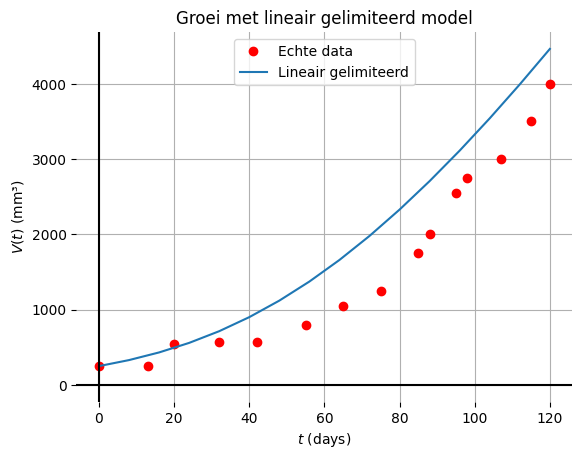

In [3]:
model = ode_solver(Vs_exact[0], 15, 8)
params0 = {"c" : 0.0, "d" : 0}
params, mse = model.fit(
    echte_volumes=  Vs_exact,
    model = lambda c, d: model.lineair_gelimiteerd(c, d),
    params0 = params0
)

dagen, volumes = model.lineair_gelimiteerd(**params)

plt.plot(ts_exact, Vs_exact, "or", label = "Echte data")
plt.plot(dagen, volumes, label = "Lineair gelimiteerd")

plt.axhline(0.0, color="k"); plt.axvline(0.0, color="k")
plt.title("Groei met lineair gelimiteerd model"); plt.xlabel("$t$ (days)"); plt.ylabel("$V(t)$ (mm³)")
plt.grid(True); plt.box(False)
plt.legend()

plt.show()

In deze figuur is te zien dat het model een redelijke lijn door de data kan maken. De laatste meting van de data is gedaan op dag 120, dit model zou gebruikt kunnen worden om te voorspellen hoe groot de tumor gaat zijn na bijvoorbeeld 150 dagen. In een plot zou dat er als volgt uit zien:

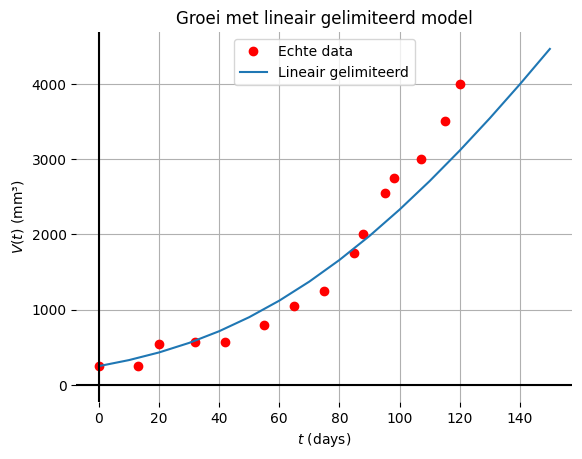

In [4]:

model = ode_solver(250, 15, 10)
params0 = {"c" : 0.0, "d" : 0}
params, mse = model.fit(
    echte_volumes=  Vs_exact,
    model = lambda c, d: model.lineair_gelimiteerd(c, d),
    params0 = params0
)

dagen, volumes = model.lineair_gelimiteerd(**params)

plt.plot(ts_exact, Vs_exact, "or", label = "Echte data")
plt.plot(dagen, volumes, label = "Lineair gelimiteerd")

plt.axhline(0.0, color="k"); plt.axvline(0.0, color="k")
plt.title("Groei met lineair gelimiteerd model"); plt.xlabel("$t$ (days)"); plt.ylabel("$V(t)$ (mm³)")
plt.grid(True); plt.box(False)
plt.legend()

plt.show()

Zoals in de figuur te zien is gaat het model nu voorbij de gegeven data. Het model ziet er iets anders uit dan de eerste figuur omdat deze opnieuw is gefit. Hiermee kan voorspelt worden hoe groot de tumor is na een X aantal dagen.

## Voorbeeld 2
Voor het tweede voorbeel gaan we met de volgende dataset werken:  
https://www.researchgate.net/figure/Data-used-for-tumor-volume-changes-over-time_tbl2_379619943


In [5]:
import pandas as pd
from ode_solver import *

dagen = [0,13,20,32,42,55,65,75,85,88,95,98,107,115,120]
volumes = [25,25,55,57,57,80,105,125,175,200,255,275,300,350,400]
echte_data = pd.DataFrame({"$t$": dagen, "$V$": volumes}).T
echte_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
$t$,0,13,20,32,42,55,65,75,85,88,95,98,107,115,120
$V$,25,25,55,57,57,80,105,125,175,200,255,275,300,350,400


Als eerst gaan we alle modelen weer vergelijken zoals bij voorbeeld 1

In [6]:
# Voor elk model de AIC en BIC waardes berekenen:
aantal_datapunten = len(volumes)
Vs = [1,2,3,4,5,6,7,9,9,10,11,12,13,14,15]

n = 15
delta_t = 8
# 15*8 = 120 voor de voorseplde hoeveelheid dagen zodat dit gelijk is aan het eindmodel
solver = ode_solver(Vs[0], n, delta_t)
params0 = {"c" : 0.0, "min_volume" : 0, "max_volume" : 0}
params, mse = solver.fit(
    echte_volumes=  volumes,
    model = lambda c, min_volume, max_volume: solver.allee(c, min_volume, max_volume),
    params0 = params0
)
allee_aic = solver.aic(mse, aantal_datapunten, len(params))
alle_bic = solver.bic(mse, aantal_datapunten, len(params))


params0 = {"c" : 0.0, "max_volume" : 0}
params, mse = solver.fit(
    echte_volumes=  volumes,
    model = lambda c, max_volume: solver.exponentieel_afvlakkend(c, max_volume),
    params0 = params0
)
exponentieel_afvlakkend_aic = solver.aic(mse, aantal_datapunten, len(params))
exponentieel_afvlakkend_bic = solver.bic(mse, aantal_datapunten, len(params))


params0 = {"c" : 0.0}
params, mse = solver.fit(
    echte_volumes=  volumes,
    model = lambda c: solver.exponentieel_toenemend(c),
    params0 = params0
)
exponentieel_toenemend_aic = solver.aic(mse, aantal_datapunten, len(params))
exponentieel_toenemend_bic = solver.bic(mse, aantal_datapunten, len(params))


params0 = {"c" : 0.1, "volume_max" : 100}
params, mse = solver.fit(
    echte_volumes=  volumes,
    model = lambda c, volume_max: solver.gompertz(c, volume_max),
    params0 = params0
)
gompertz_aic = solver.aic(mse, aantal_datapunten, len(params))
gompertz_bic = solver.bic(mse, aantal_datapunten, len(params))


params0 = {"c" : 0.0}
params, mse = solver.fit(
    echte_volumes=  volumes,
    model = lambda c: solver.lineair(c),
    params0 = params0
)
lineair_aic = solver.aic(mse, aantal_datapunten, len(params))
lineair_bic = solver.bic(mse, aantal_datapunten, len(params))


params0 = {"c" : 0.0, "d" : 0}
params, mse = solver.fit(
    echte_volumes=  volumes,
    model = lambda c, d: solver.lineair_gelimiteerd(c, d),
    params0 = params0
)
lineair_gelimiteerd_aic = solver.aic(mse, aantal_datapunten, len(params))
lineair_gelimiteerd_bic = solver.bic(mse, aantal_datapunten, len(params))


params0 = {"c" : 0.0, "max_volume" : 0}
params, mse = solver.fit(
    echte_volumes=  volumes,
    model = lambda c, max_volume: solver.logistisch(c, max_volume),
    params0 = params0
)
logistisch_aic = solver.aic(mse, aantal_datapunten, len(params))
logistisch_bic = solver.bic(mse, aantal_datapunten, len(params))


params0 = {"c" : 0.0, "d" : 0}
params, mse = solver.fit(
    echte_volumes=  volumes,
    model = lambda c, d: solver.mendelsohn(c, d),
    params0 = params0
)
mendelsohn_aic = solver.aic(mse, aantal_datapunten, len(params))
mendelsohn_bic = solver.bic(mse, aantal_datapunten, len(params))


params0 = {"c" : 0.25, "d" : 1.0, "max_volume" : 4500.0}
params, mse = solver.fit(
    echte_volumes=  volumes,
    model = lambda c, d, max_volume: solver.montroll(c, d, max_volume),
    params0 = params0
)
montroll_aic = solver.aic(mse, aantal_datapunten, len(params))
montroll_bic = solver.bic(mse, aantal_datapunten, len(params))


params0 = {"c" : 0.0, "d" : 0.0}
params, mse = solver.fit(
    echte_volumes=  volumes,
    model = lambda c, d: solver.oppervlakte_gelimiteerd(c, d),
    params0 = params0
)
oppervlakte_gelimiteerd_aic = solver.aic(mse, aantal_datapunten, len(params))
oppervlakte_gelimiteerd_bic = solver.bic(mse, aantal_datapunten, len(params))


params0 = {"c" : 0.0, "d" : 0.0}
params, mse = solver.fit(
    echte_volumes=  volumes,
    model = lambda c, d: solver.von_bertalanffy(c, d),
    params0 = params0
)
von_bertalanffy_aic = solver.aic(mse, aantal_datapunten, len(params))
von_bertalanffy_bic = solver.bic(mse, aantal_datapunten, len(params))


print("AIC-waarde per model:")
print(f"Allee: {round(allee_aic, 3)}")
print(f"Exponentieel afvlakkend: {round(exponentieel_afvlakkend_aic, 3)}")
print(f"Exponentieel toenemend: {round(exponentieel_toenemend_aic, 3)}")
print(f"Gompertz: {round(gompertz_aic, 3)}")
print(f"Lineair: {round(lineair_aic, 3)}")
print(f"Lineair gelimiteerd: {round(lineair_gelimiteerd_aic, 3)}")
print(f"Logistisch: {round(logistisch_aic, 3)}")
print(f"Mendelsohn: {round(mendelsohn_aic, 3)}")
print(f"Montroll: {round(montroll_aic, 3)}")
print(f"Oppervlakte gelimiteerd: {round(oppervlakte_gelimiteerd_aic, 3)}")
print(f"Von Bertalanffy: {round(von_bertalanffy_aic, 3)}\n")


print("BIC-waarde per model:")
print(f"Allee: {round(alle_bic, 3)}")
print(f"Exponentieel afvlakkend: {round(exponentieel_afvlakkend_bic, 3)}")
print(f"Exponentieel toenemend: {round(exponentieel_toenemend_bic, 3)}")
print(f"Gompertz: {round(gompertz_bic, 3)}")
print(f"Lineair: {round(lineair_bic, 3)}")
print(f"Lineair gelimiteerd: {round(lineair_gelimiteerd_bic, 3)}")
print(f"Logistisch: {round(logistisch_bic, 3)}")
print(f"Mendelsohn: {round(mendelsohn_bic, 3)}")
print(f"Montroll: {round(montroll_bic, 3)}")
print(f"Oppervlakte gelimiteerd: {round(oppervlakte_gelimiteerd_bic, 3)}")
print(f"Von Bertalanffy: {round(von_bertalanffy_bic, 3)}")

AIC-waarde per model:
Allee: 159.433
Exponentieel afvlakkend: 136.184
Exponentieel toenemend: 138.456
Gompertz: 121.463
Lineair: 1961.851
Lineair gelimiteerd: 88.746
Logistisch: 157.803
Mendelsohn: 81.948
Montroll: 255.169
Oppervlakte gelimiteerd: 123.179
Von Bertalanffy: 87.265

BIC-waarde per model:
Allee: 161.557
Exponentieel afvlakkend: 137.601
Exponentieel toenemend: 139.164
Gompertz: 122.879
Lineair: 1962.559
Lineair gelimiteerd: 90.163
Logistisch: 159.219
Mendelsohn: 83.364
Montroll: 257.293
Oppervlakte gelimiteerd: 124.595
Von Bertalanffy: 88.681


Vanuit de BIC en AIC waardes kunnen we aflezen dat de Mendelsohn methode het beste model is voor deze data

In [7]:
model = ode_solver(25, 15, 8)
params0 = {"c" : 0.0, "d" : 0}
params, mse = model.fit(
    echte_volumes=  volumes,
    model = lambda c, d: model.mendelsohn(c, d),
    params0 = params0
)

v_dagen, v_volumes = model.mendelsohn(**params)

voorspelde_data = pd.DataFrame({"$t$": v_dagen, "$V$": v_volumes}).T
voorspelde_data


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
$t$,0.0,8.000000,16.00000,24.000000,32.000000,40.000000,48.00000,56.000000,64.000000,72.000000,80.000000,88.000000,96.000000,104.000000,112.000000,120.000000
$V$,25.0,34.263631,45.53318,58.994862,74.833291,93.231628,114.37171,138.434147,165.598424,196.042969,229.945227,267.481721,308.828103,354.159204,403.649076,457.471035


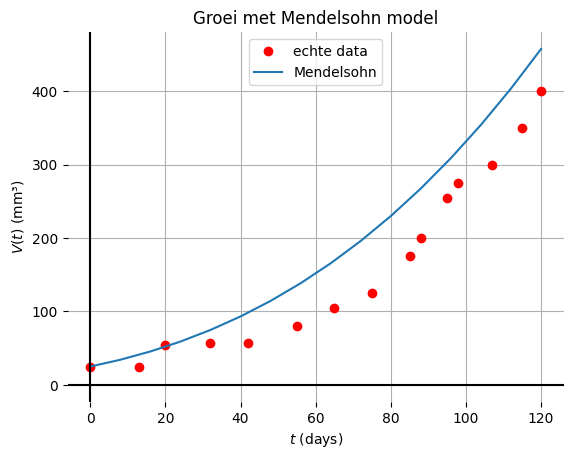

In [8]:
plt.plot(dagen, volumes, "or", label = "echte data")
plt.plot(v_dagen, v_volumes, label = "Mendelsohn")

plt.axhline(0.0, color="k"); plt.axvline(0.0, color="k")
plt.title("Groei met Mendelsohn model"); plt.xlabel("$t$ (days)"); plt.ylabel("$V(t)$ (mm³)")
plt.grid(True); plt.box(False)
plt.legend()

plt.show()

zoals te zien in de grafiek loopt de lijn relatief goed door de data heen.  

Als je met dit model verder wilt rekenen kun je het voorbeeld volgen of handmatig een dictionairy met de benodigde variablen megeven aan de ode methode of een dictionary met je eigen waardes meegeven.

In [9]:
# start waardes
start_volume = 25
number_of_data_points = 15
delta_t = 11

model = ode_solver(start_volume, number_of_data_points, delta_t)
# parameters voor het model
params0 = {"c" : 0.0, "d" : 0}

params, mse = model.fit(
    echte_volumes=  volumes,
    model = lambda c, d: model.mendelsohn(c, d),
    params0 = params0
)
# params als argument in het method model
v_dagen, v_volumes = model.mendelsohn(**params)

voorspelde_data = pd.DataFrame({"$t$": v_dagen, "$V$": v_volumes}).T
voorspelde_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
$t$,0.0,11.000000,22.000000,33.000000,44.000000,55.000000,66.000000,77.000000,88.000000,99.000000,110.000000,121.000000,132.000000,143.000000,154.000000,165.00000
$V$,25.0,34.246867,45.498287,58.942018,74.764431,93.150639,114.284604,138.349222,165.526408,195.997159,229.941611,267.539097,308.968189,354.406738,404.031917,458.02025


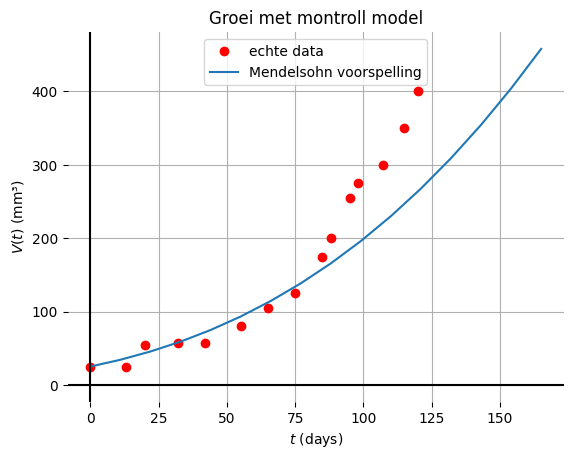

In [10]:
plt.plot(dagen, volumes, "or", label = "echte data")
plt.plot(v_dagen, v_volumes, label = "Mendelsohn voorspelling")

plt.axhline(0.0, color="k"); plt.axvline(0.0, color="k")
plt.title("Groei met montroll model"); plt.xlabel("$t$ (days)"); plt.ylabel("$V(t)$ (mm³)")
plt.grid(True); plt.box(False)
plt.legend()

plt.show()

Zoals te zien aan de voorspelde lijn loopt in lijn goed voor de eerste 75 dagen daarna begint de voorspelling van dit model sterk af te wijken. wat duidt op een limietatie van dit model.